# Hermite interpolation in 2D

### Nicolás Guarín-Zapata


In this notebook, we find the (Hermite) interpolation functions for the domain
[-1, 1]. We later on try it on a pieciwise interpolation. Notice that this
interpolation has $C^1$ continuity compared to the $C^0$ continuity that is
common in Lagrange interpolation.


Wiki: https://en.wikipedia.org/wiki/Bicubic_interpolation

In [1]:
%matplotlib notebook
from __future__ import division
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sym.init_printing()

We want to find a set of basis function that satisfy

\begin{align}
N_i(x_i, y_i) &= 1\\
N_i(x_j, y_j) &= 0\\
\frac{\partial}{\partial x}N_i(x_i, y_i) &= 1\\
\frac{\partial}{\partial x}N_i(x_j, y_j) &= 0\\
\frac{\partial}{\partial y}N_i(x_i, y_i) &= 1\\
\frac{\partial}{\partial y}N_i(x_j, y_j) &= 0\\
\frac{\partial^2}{\partial x \partial y}N_i(x_i, y_i) &= 1\\
\frac{\partial^2}{\partial x \partial y}N_i(x_j, y_j) &= 0\\
\end{align}



In [3]:
x1, x2, x3, x4 = sym.symbols("x1 x2 x3 x4", real=True)
y1, y2, y3, y4 = sym.symbols("y1 y2 y3 y4", real=True)
x, y = sym.symbols("x y", real=True)


In [4]:
a = sym.symbols("a0:16")
terms = [x**i * y**j for i in range(4) for j in range(4)]
poly = sum(a[cont] * terms[cont] for cont in range(16))
poly_x = sym.diff(poly, x)
poly_y = sym.diff(poly, y)
poly_xy = sym.diff(poly, x, y)

In [5]:
x_coords = [-1, 1, -1, 1]
y_coords = [-1, -1, 1, 1]
#x_coords = [x1, x2, x3, x4]
#y_coords = [y1, y2, y3, y4]

In [6]:
V = sym.zeros(16, 16)

for node in range(4):
    for col in range(16):
        V[4*node, col] = poly.diff(a[col]).subs({x: x_coords[node], y: y_coords[node]})
        V[4*node + 1, col] = poly_x.diff(a[col]).subs({x: x_coords[node], y: y_coords[node]})
        V[4*node + 2, col] = poly_y.diff(a[col]).subs({x: x_coords[node], y: y_coords[node]})
        V[4*node + 3, col] = poly_xy.diff(a[col]).subs({x: x_coords[node], y: y_coords[node]})

In [7]:
V

⎡1  -1  1   -1  -1  1   -1  1   1   -1  1   -1  -1  1   -1  1 ⎤
⎢                                                             ⎥
⎢0  0   0   0   1   -1  1   -1  -2  2   -2  2   3   -3  3   -3⎥
⎢                                                             ⎥
⎢0  1   -2  3   0   -1  2   -3  0   1   -2  3   0   -1  2   -3⎥
⎢                                                             ⎥
⎢0  0   0   0   0   1   -2  3   0   -2  4   -6  0   3   -6  9 ⎥
⎢                                                             ⎥
⎢1  -1  1   -1  1   -1  1   -1  1   -1  1   -1  1   -1  1   -1⎥
⎢                                                             ⎥
⎢0  0   0   0   1   -1  1   -1  2   -2  2   -2  3   -3  3   -3⎥
⎢                                                             ⎥
⎢0  1   -2  3   0   1   -2  3   0   1   -2  3   0   1   -2  3 ⎥
⎢                                                             ⎥
⎢0  0   0   0   0   1   -2  3   0   2   -4  6   0   3   -6  9 ⎥
⎢                                       

In [8]:
V_inv = V.inv()
V_inv


⎡ 1/4    1/8    1/8   1/16    1/4   -1/8    1/8   -1/16   1/4    1/8   -1/8   
⎢                                                                             
⎢-3/8   -3/16  -1/8   -1/16  -3/8   3/16   -1/8   1/16    3/8   3/16   -1/8   
⎢                                                                             
⎢  0      0    -1/8   -1/16    0      0    -1/8   1/16     0      0     1/8   
⎢                                                                             
⎢ 1/8   1/16    1/8   1/16    1/8   -1/16   1/8   -1/16  -1/8   -1/16   1/8   
⎢                                                                             
⎢-3/8   -1/8   -3/16  -1/16   3/8   -1/8   3/16   -1/16  -3/8   -1/8   3/16   
⎢                                                                             
⎢9/16   3/16   3/16   1/16   -9/16  3/16   -3/16  1/16   -9/16  -3/16  3/16   
⎢                                                                             
⎢  0      0    3/16   1/16     0      0    -3/16  1/

In [9]:
shape_funs = sym.factor(V_inv.T * sym.Matrix(terms))
shape_funs

⎡        2                2         ⎤
⎢ (x - 1) ⋅(x + 2)⋅(y - 1) ⋅(y + 2) ⎥
⎢ ───────────────────────────────── ⎥
⎢                 16                ⎥
⎢                                   ⎥
⎢        2                2         ⎥
⎢ (x - 1) ⋅(x + 1)⋅(y - 1) ⋅(y + 2) ⎥
⎢ ───────────────────────────────── ⎥
⎢                 16                ⎥
⎢                                   ⎥
⎢        2                2         ⎥
⎢ (x - 1) ⋅(x + 2)⋅(y - 1) ⋅(y + 1) ⎥
⎢ ───────────────────────────────── ⎥
⎢                 16                ⎥
⎢                                   ⎥
⎢        2                2         ⎥
⎢ (x - 1) ⋅(x + 1)⋅(y - 1) ⋅(y + 1) ⎥
⎢ ───────────────────────────────── ⎥
⎢                 16                ⎥
⎢                                   ⎥
⎢                2        2         ⎥
⎢-(x - 2)⋅(x + 1) ⋅(y - 1) ⋅(y + 2) ⎥
⎢───────────────────────────────────⎥
⎢                 16                ⎥
⎢                                   ⎥
⎢                2        2         ⎥
⎢ (x - 1)⋅(x

In [10]:
f = sym.sin(2*x)*sym.sin(2*y)
fx = f.diff(x)
fy = f.diff(y)
fxy = f.diff(x, y)

In [11]:
vals = sym.zeros(16, 1)
for node in range(4):
    vals[4*node] = f.subs({x: x_coords[node], y: y_coords[node]})
    vals[4*node + 1] = fx.subs({x: x_coords[node], y: y_coords[node]})
    vals[4*node + 2] = fy.subs({x: x_coords[node], y: y_coords[node]})
    vals[4*node + 3] = fxy.subs({x: x_coords[node], y: y_coords[node]})
vals

⎡       2        ⎤
⎢    sin (2)     ⎥
⎢                ⎥
⎢-2⋅sin(2)⋅cos(2)⎥
⎢                ⎥
⎢-2⋅sin(2)⋅cos(2)⎥
⎢                ⎥
⎢        2       ⎥
⎢   4⋅cos (2)    ⎥
⎢                ⎥
⎢        2       ⎥
⎢    -sin (2)    ⎥
⎢                ⎥
⎢-2⋅sin(2)⋅cos(2)⎥
⎢                ⎥
⎢2⋅sin(2)⋅cos(2) ⎥
⎢                ⎥
⎢        2       ⎥
⎢   4⋅cos (2)    ⎥
⎢                ⎥
⎢        2       ⎥
⎢    -sin (2)    ⎥
⎢                ⎥
⎢2⋅sin(2)⋅cos(2) ⎥
⎢                ⎥
⎢-2⋅sin(2)⋅cos(2)⎥
⎢                ⎥
⎢        2       ⎥
⎢   4⋅cos (2)    ⎥
⎢                ⎥
⎢       2        ⎥
⎢    sin (2)     ⎥
⎢                ⎥
⎢2⋅sin(2)⋅cos(2) ⎥
⎢                ⎥
⎢2⋅sin(2)⋅cos(2) ⎥
⎢                ⎥
⎢        2       ⎥
⎣   4⋅cos (2)    ⎦

In [12]:
interp_fun = (shape_funs.T * vals)[0]
sym.simplify(interp_fun)

In [13]:
f_num = sym.lambdify([x, y], f, "numpy")
interp_num = sym.lambdify([x, y], interp_fun, "numpy")

In [14]:
x_grid, y_grid = np.mgrid[-1:1:101j, -1:1:101j]
z1 = f_num(x_grid, y_grid)
z2 = interp_num(x_grid, y_grid)

<IPython.core.display.Javascript object>


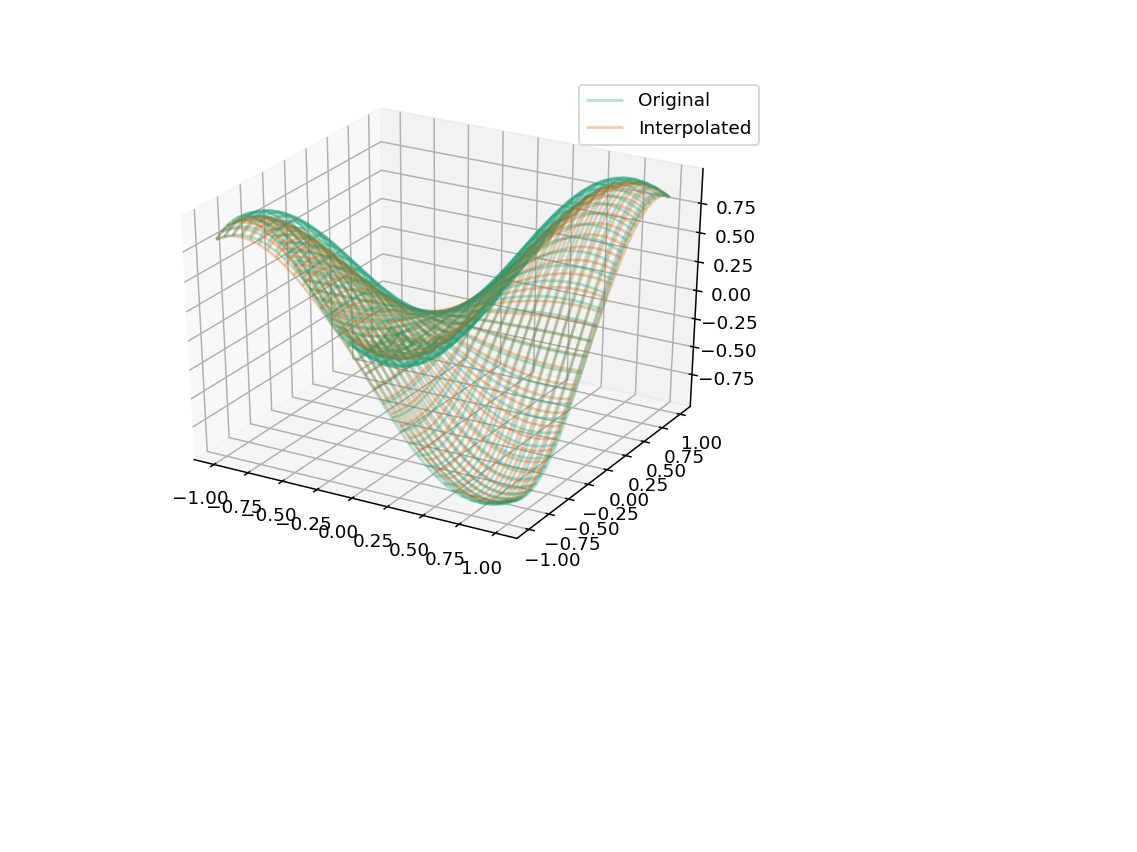

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x_grid, y_grid, z1, colors="#1b9e77", alpha=0.3)
ax.plot_wireframe(x_grid, y_grid, z2, colors="#d95f02", alpha=0.3)
plt.legend(["Original", "Interpolated"])


In [16]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()